<a href="https://colab.research.google.com/github/tejaswini-meshram/Product_stock_recommendation_system/blob/main/Product_stock_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [23]:
# Create a sample dataset
data = {
    'month': range(1, 25),  # Two years of monthly data
    'sales': [120, 150, 170, 200, 210, 250, 270, 300, 310, 350, 370, 400,
              130, 160, 180, 210, 220, 260, 280, 310, 320, 360, 380, 410]
}

df = pd.DataFrame(data)


In [24]:
# Add seasonal feature
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


In [25]:
# Split the data
X = df[['month', 'month_sin', 'month_cos']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Make predictions
y_pred = model.predict(X_test)


In [28]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 52.22


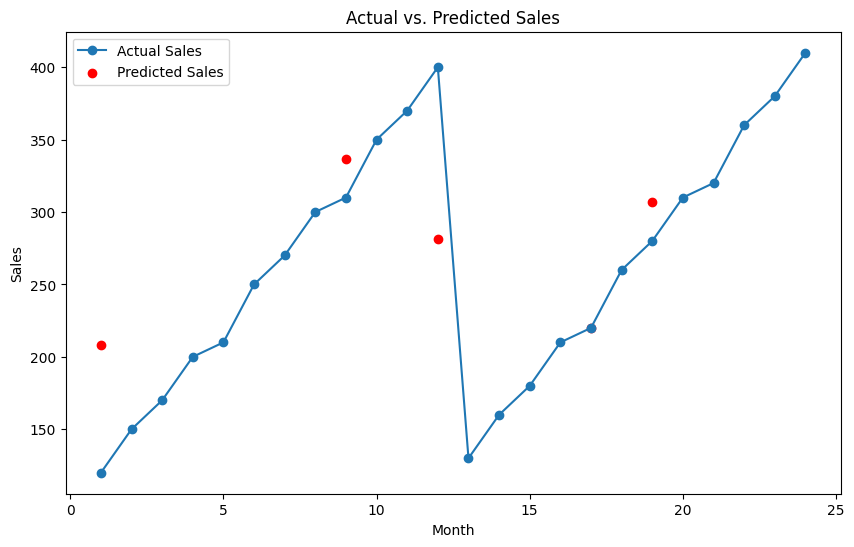

In [29]:
# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['sales'], label='Actual Sales', marker='o')
plt.scatter(X_test['month'], y_pred, color='red', label='Predicted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()
